![Aeropython Logo](/files/imagenes/aeropython_logo.png)

#Simplifica tu vida con sistemas complejos y algoritmos genéticos

## Parte 3 - El dilema Exploración - Explotación: feedback positivo y negativo

Cuando usamos algoritmos genéticos y sistemas complejos, en general, estaremos buscando optimizar funciones muy complicadas, de varios parámetros, a menudo incluso implícitas (como la optimización de un avión mediante CFD). Estas funciones normalmente tendrán óptimos locales, soluciones *buenas*, pero que no son el máximo global, la mejor solución, que es lo que buscamos.

Hagamos un pequeño esquema para verlo claramente!

In [1]:
%matplotlib inline  
import numpy as np # Usaremos arrays
import matplotlib.pyplot as plt # Para pintar resultados

Supongamos que esta curva representa a una función cuyo máximo buscamos, y supongamos que el eje x representa parámetros de los que la función depende.

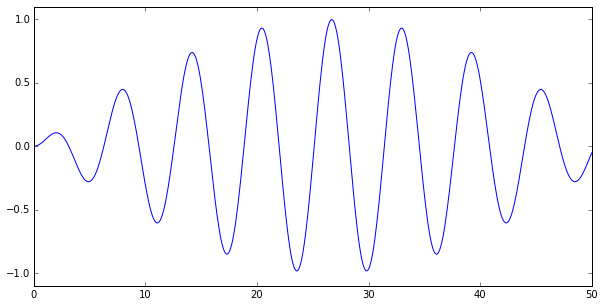

In [2]:
x = np.linspace(0,50,500)
y = np.sin(x) * np.sin(x/17)
plt.figure(None, figsize=(10,5))
plt.ylim(-1.1, 1.1)
plt.plot(x,y)

Supongamos que con un algoritmo hemos encontrado un punto alto, pero que corresponde a un óptimo local, por ejemplo:

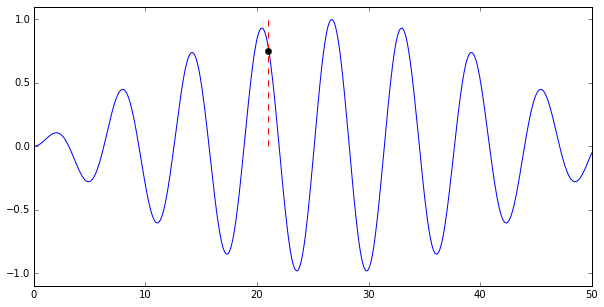

In [3]:
plt.figure(None, figsize=(10,5))
plt.ylim(-1.1, 1.1)
plt.plot(x,y)
plt.plot([21,21],[0,1],'r--')
plt.plot(21, 0.75, 'ko')

El dilema Exploración-Explotación hace referencia a a dos fuerzas contrapuestas que necesitamos equilibrar cuidadosamente cuando usemos estos tipos de algoritmos.

La **Exploración** se refiere a buscar soluciones alejadas de lo que tenemos, abrir nuestro abanico de búsqueda.

- Nos permite escapar de máximos locales y encontrar el global.
- Nos permite encontrar soluciones atípicas y novedosas a problemas complicados.
- Demasiada exploración nos impedirá guardar nuestras soluciones y refinarlas, y tendremos a nuestro algoritmo saltando de un lado a otro sin sacar nada en claro.

La **Explotación** se refiere a la capacidad de nuestro algoritmo de mantener las soluciones buenas que ha encontrado y refinarlas, buscando en entornos cercanos.

- Nos permite encontrar máximos de la función y mantenerlos.
- Demasiada Explotación nos bloqueará en máximos locales y nos impedirá encontrar el global.

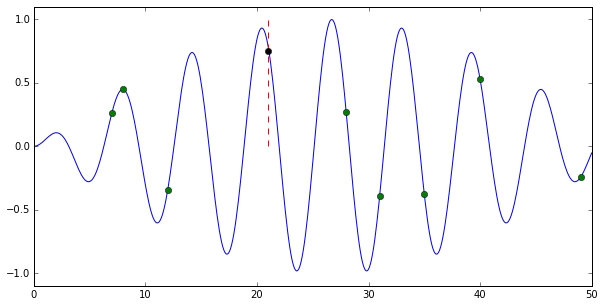

In [4]:
#   EJEMPLO DE RESULTADO CON DEMASIADA EXPLORACIÓN: NO SE ENCUENTRA NADA


x2 = np.array([7,8,12,28,31,35,40,49])
y2 = np.sin(x2) * np.sin(x2/17)

plt.figure(None, figsize=(10,5))
plt.ylim(-1.1, 1.1)
plt.plot(x,y)
plt.plot([21,21],[0,1],'r--')
plt.plot(21, 0.75, 'ko')
plt.plot(x2, y2, 'go')

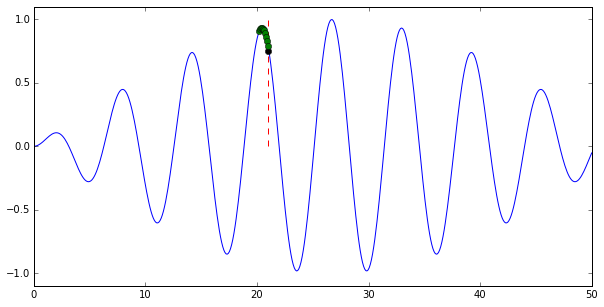

In [5]:
#   EJEMPLO DE RESULTADO CON DEMASIADA EXPLOTACIÓN: SÓLO SE LLEGA AL LOCAL


x2 = np.linspace(20.2, 21, 10)
y2 = np.sin(x2) * np.sin(x2/17)

plt.figure(None, figsize=(10,5))
plt.ylim(-1.1, 1.1)
plt.plot(x,y)
plt.plot([21,21],[0,1],'r--')
plt.plot(21, 0.75, 'ko')
plt.plot(x2, y2, 'go')

Este tipo de estrategias se modulan mediante todos los parámetros de los algoritmos, pero quizás el parámetro que más claramente influye en este equilibrio es el de la mutación en los algoritmos genéticos: Reduciendo el índice de mutación potenciaremos la explotación, mientras que si lo aumentamos, potenciamos la exploración.

##Ejemplo: Laberinto

In [6]:
#Usaremos el paquete en el ejercicio del laberinto
import Ejercicios.Laberinto.laberinto.laberinto as lab
ag = lab.ag

Supongamos que tenemos el siguiente laberinto, al que accedemos por la izquierda y que queremos resolver:

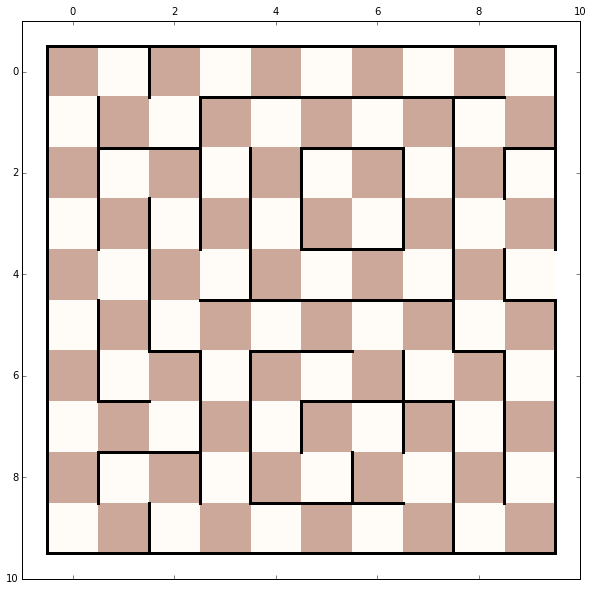

In [7]:
mapa1 = lab.Map()
mapa1.draw_tablero()

En el ejercicio se detalla más el proceso, llamemos aquí simplemente al algoritmo genético que lo resuelve:

1·2·3·4·5·6·7·8·9·10·11·12·13·14·15·16·17·18·19·20·21·22·23·24·25·26·27·28·29·30·31·32·33·34·35·36·37·38·39·40·41·42·43·44·45·46·47·48·49·50·51·52·53·54·55·56·57·58·59·60·61·62·63·64·65·66·67·68·69·70·71·72·73·74·75·76·77·78·79·80·81·82·83·84·85·86·87·88·89·90·91·92·93·94·95·96·97·98·99·100·

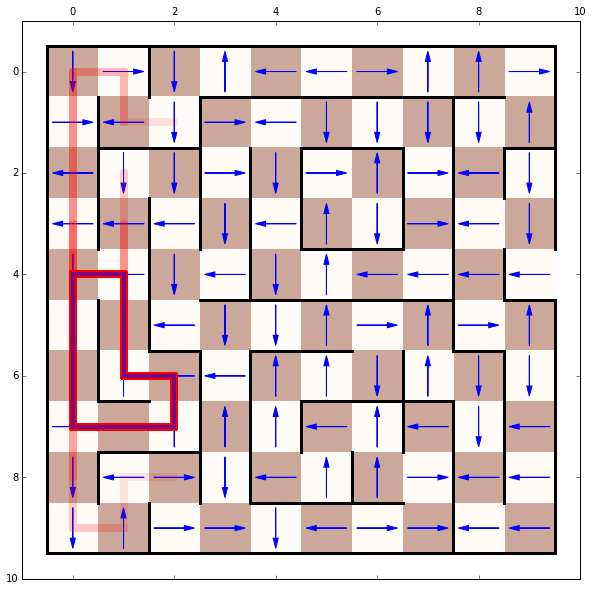

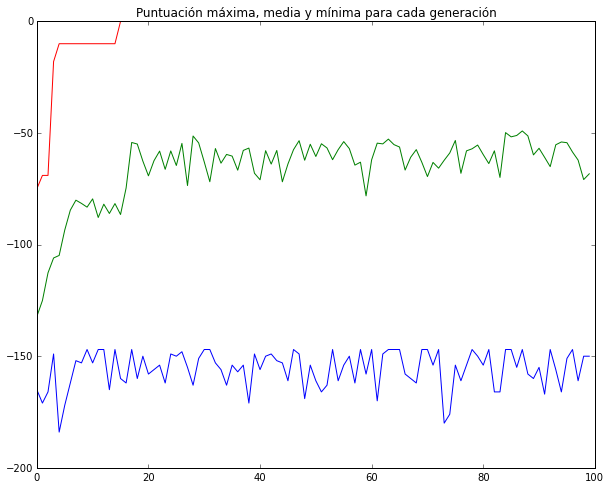

In [8]:
mapa1 = lab.Map()
lab.avanzar(mapa1)
lab.draw_all(mapa1)

Lo más probable es que hayas obtenido una solución o un camino cerrado en un bucle. Puedes ejecutar la celda superior varias veces para hecerte una idea aproximada de con qué frecuencia aparece cada situación. Pero, ¿por qué aparecen estos bucles?

Examinemos qué aspecto tiene una solución:

Cada casilla contiene una flecha que indica cuál es la siguiente casilla a la que cruzar. Esto es lo que se describe en el genoma de cada camino.

Si la casilla apunta a una pared, el programa intentará cruzar de todos modos a una casilla aleatoria diferente.

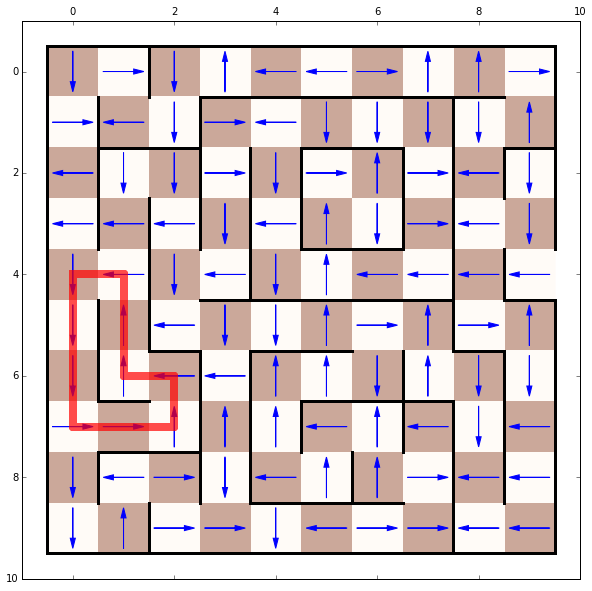

In [9]:
mapa1.list_caminos[0].draw_directions()
mapa1.list_caminos[0].draw_path(0.7)

La respuesta a por qué se forman bucles está en cómo se define la función de fitness o puntuación de cada camino:

- Se recorren 50 casillas, intentando seguir el camino que determinan las flechas
- Cada vez que se **choca con una pared**, o que se vuelve a la casilla anterior (por ejemplo, si dos flechas se apuntan mutuamente), **se pierden puntos**.
- Se obtiene una puntuación mejor cuanto más a la derecha acabe el caminante.
- Se obtiene una gran bonificación si se llega a la salida

En este ejercicio, un bucle es un optimo local: Al no chocarse con nada al recorrerlo, la puntuación es mejor que la de caminos ligeramente diferentes, que terminarían chocando con las paredes varias veces.

Sin embargo, no es la solución que buscamos. Tenemos que potenciar la exploración lejos de estos máximos locales.

Una manera de hacerlo es con feromonas, parecido a lo que hicimos con las hormigas.

Supongamos que cada persona que camina por el laberinto, deja por cada casilla por la que pasa un olor desagradable, que hace que los que vuelvan a pasar por allí intenten evitar ese camino. La manera de implementar esto en el algoritmo es añadir un rastro de feromonas, y luego tener en cuenta la cantidad de feromonas encontradas al calcular la puntuación. ¿Cómo crees que eso afectaría a los bucles?

Probémoslo!

1·2·3·4·5·6·7·8·9·10·11·12·13·14·15·16·17·18·19·20·21·22·23·24·25·26·27·28·29·30·31·32·33·34·35·36·37·38·39·40·41·42·43·44·45·46·47·48·49·50·51·52·53·54·55·56·57·58·59·60·61·62·63·64·65·66·67·68·69·70·71·72·73·74·75·76·77·78·79·80·81·82·83·84·85·86·87·88·89·90·91·92·93·94·95·96·97·98·99·100·

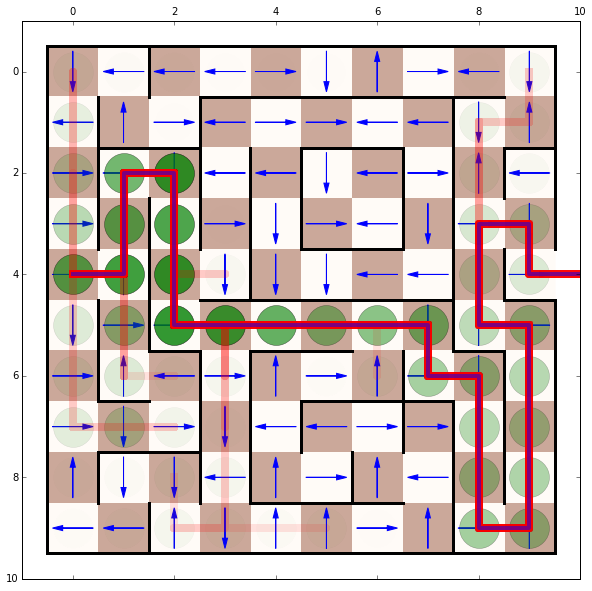

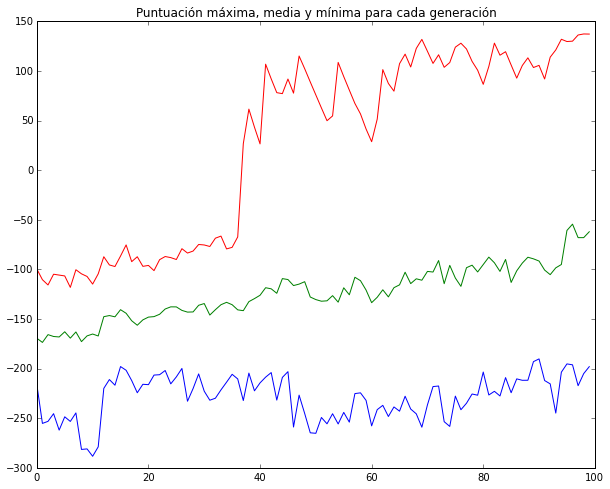

In [12]:
mapa1 = lab.Map(veneno=1)
lab.avanzar(mapa1)
lab.draw_all(mapa1)

Prueba e ejecutarlo varias veces. ¿Notas si ha cambiado la cantidad de bucles?

Por último, veamos que ocurre si potenciamos la exploración demasiado:

1·2·3·4·5·6·7·8·9·10·11·12·13·14·15·16·17·18·19·20·21·22·23·24·25·26·27·28·29·30·31·32·33·34·35·36·37·38·39·40·41·42·43·44·45·46·47·48·49·50·51·52·53·54·55·56·57·58·59·60·61·62·63·64·65·66·67·68·69·70·71·72·73·74·75·76·77·78·79·80·81·82·83·84·85·86·87·88·89·90·91·92·93·94·95·96·97·98·99·100·

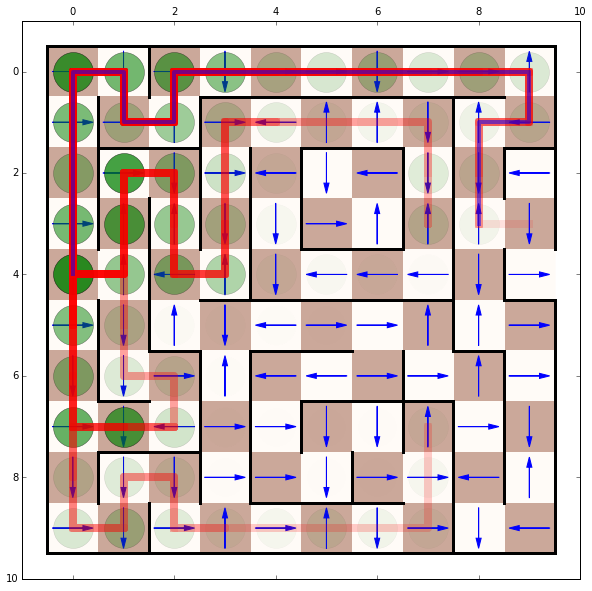

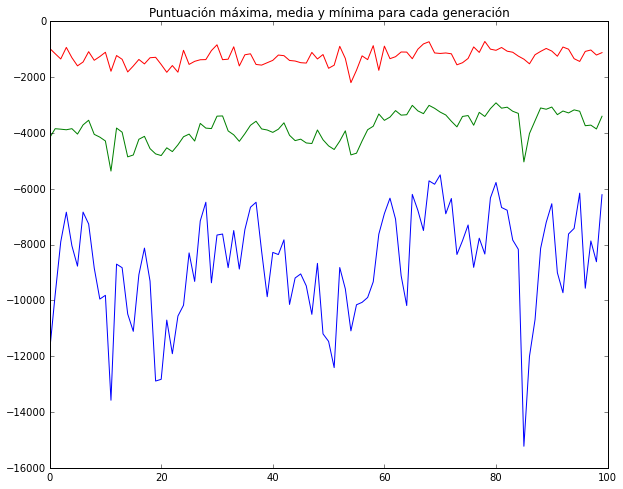

In [11]:
mapa1 = lab.Map(veneno=100)
lab.avanzar(mapa1)
lab.draw_all(mapa1)

¿Cómo explicas lo que ocurre? ¿Por qué hemos perdido la capacidad para encontrar soluciones al potenciar demasiado la exploración?

Siro Moreno, Aeropython, 19 de Noviembre de 2015
